# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


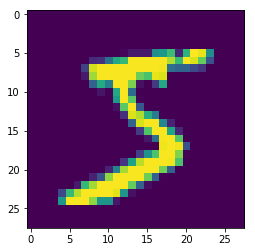

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(12, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(Convolution2D(12, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4,4))

model.add(Flatten())
model.add(Activation('softmax'))





Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 24)        2616      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 24)        96        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        250       
__________

In [11]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.219 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])



Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 166us/step - loss: 0.2205 - acc: 0.9295 - val_loss: 0.0957 - val_acc: 0.9722
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0024610336.
60000/60000 [==============================] - 7s 120us/step - loss: 0.0710 - acc: 0.9778 - val_loss: 0.0585 - val_acc: 0.9816
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0020862309.
60000/60000 [==============================] - 7s 110us/step - loss: 0.0559 - acc: 0.9823 - val_loss: 0.0441 - val_acc: 0.9866
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0018105009.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0467 - acc: 0.9858 - val_loss: 0.0393 - val_acc: 0.9870
Epoch 5/30

Epoch 00005: LearningRateScheduler setting l

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [13]:
print(score)

[0.01817153180540772, 0.9943]
